# Reading in the Data

** NOTE: I've removed any state-level columns as redundant, as well as explanatory variables we wouldn't want (eg. unit_code, school_name, etc) **

** Some sets of variables still won't work when passing some sets of dataframes - they dont exist in all dataframes, and I'm not sure of a safe way to handle that **

Can we include in the function a way to only synthesize data for public schools that are low performing? ie) don't increase the total_nbpts_num for *all* schools - only the ones that are low performing?

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import pickle
import warnings

# Loading data
initial_path = '/Users/Olivia/SMUDS/Capstone/B/Github/Dataset Creation/'

# 2014 Datasets
df_elem_14 = pd.read_csv(initial_path+'2014/PublicElementarySchools2014_LPS_Processed.csv')
df_mid_14 = pd.read_csv(initial_path+'2014/PublicMiddleSchools2014_LPS_Processed.csv')
df_high_14 = pd.read_csv(initial_path+'2014/PublicHighSchools2014_LPS_Processed.csv')

# 2015 Datasets
df_elem_15 = pd.read_csv(initial_path+'2015/PublicElementarySchools2015_LPS_Processed.csv')
df_mid_15 = pd.read_csv(initial_path+'2015/PublicMiddleSchools2015_LPS_Processed.csv')
df_high_15 = pd.read_csv(initial_path+'2015/PublicHighSchools2015_LPS_Processed.csv')

# 2016 Datasets
df_elem_16 = pd.read_csv(initial_path+'2016/PublicElementarySchools2016_LPS_Processed.csv')
df_mid_16 = pd.read_csv(initial_path+'2016/PublicMiddleSchools2016_LPS_Processed.csv')
df_high_16 = pd.read_csv(initial_path+'2016/PublicHighSchools2016_LPS_Processed.csv')

# 2017 Datasets
df_elem_17 = pd.read_csv(initial_path+'2017/PublicElementarySchools2017_LPS_Processed.csv')
df_mid_17 = pd.read_csv(initial_path+'2017/PublicMiddleSchools2017_LPS_Processed.csv')
df_high_17 = pd.read_csv(initial_path+'2017/PublicHighSchools2017_LPS_Processed.csv')

# Changing to LPS so it works the same across each dataset
df_elem_17 = df_elem_17.rename(columns = {'LPS_17' : 'LPS'})
df_mid_17 = df_mid_17.rename(columns = {'LPS_17' : 'LPS'})
df_high_17 = df_high_17.rename(columns = {'LPS_17' : 'LPS'})

'''
# Loading in columns for different categories
fileObject = open(initial path + '2014/TableColumns/environmentCols_14.pkl', 'rb')
environment_cols = pickle.load(fileObject)

fileObject = open(initial path + '2014/TableColumns/personnelCols_14.pkl', 'rb')
personnel_cols = pickle.load(fileObject)

fileObject = open(initial path + '2014/TableColumns/yoeCols_14.pkl', 'rb')
yoe_cols = pickle.load(fileObject)

# Full list of columns, including Personnel, Environment, and Teacher Experience Variables
combined_cols = (environment_cols + list(set(personnel_cols) - set(environment_cols)))
yoe_cols = ['0-3 Years_Exp_Pct_Tch',
            '10+ Years_Exp_Pct_Tch',
            '4-10 Years_Exp_Pct_Tch',
            '0-3 Years_LEA_Exp_Pct_Prin',
            '10+ Years_LEA_Exp_Pct_Prin',
            '4-10 Years_LEA_Exp_Pct_Prin']
for col in yoe_cols:
    combined_cols.append(col)
combined_cols.append('LPS')
'''

# So that you don't have to load the pickle objects 
#   for yoe_cols, environment_cols, and personnel_cols:
yoe_cols = ['0-3 Years_Exp_Pct_Tch',
            '10+ Years_Exp_Pct_Tch',
            '4-10 Years_Exp_Pct_Tch',
            '0-3 Years_LEA_Exp_Pct_Prin',
            '10+ Years_LEA_Exp_Pct_Prin',
            '4-10 Years_LEA_Exp_Pct_Prin']

environment_cols = [
                 'avg_daily_attend_pct',
                 'crime_per_c_num',
                 'short_susp_per_c_num',
                 'long_susp_per_c_num',
                 'expelled_per_c_num',
                 'ttl_crimes_num',
                 'stud_internet_comp_num',
                 'lea_avg_daily_attend_pct',
                 'lea_crime_per_c_num',
                 'lea_short_susp_per_c_num',
                 'lea_long_susp_per_c_num',
                 'lea_expelled_per_c_num',
                 'lea_stud_internet_comp_num',
                 'digital_media_pct',
                 'Byod',
                 'grades_BYOD',
                 'avg_age_media_collection',
                 '_1_to_1_access',
                 'books_per_student',
                 'grades_1_to_1_access',
                 'lea_avg_age_media_collection',
                 'lea_books_per_student',
                 'wap_num',
                 'wap_per_classroom',
                 'lea_wap_num',
                 'lea_wap_per_classroom',
                 'SRC_devices_sent_home',
                 'SRC_Grades_Devices_Sent_Home']

personnel_cols = ['total_class_teacher_num',
                 'total_nbpts_num',
                 'prin_other_pct',
                 'prinyrs_0thru3_pct',
                 'prinyrs_4thru10_pct',
                 'prinyrs_11plus_pct',
                 'prin_advance_dgr_pct',
                 '_1yr_prin_trnovr_pct',
                 'prin_male_pct',
                 'prin_female_pct',
                 'prin_black_pct',
                 'prin_white_pct',
                 'flicensed_teach_pct',
                 'tchyrs_0thru3_pct',
                 'tchyrs_4thru10_pct',
                 'tchyrs_11plus_pct',
                 'class_teach_num',
                 'nbpts_num',
                 'advance_dgr_pct',
                 '_1yr_tchr_trnovr_pct',
                 'emer_prov_teach_pct',
                 'lateral_teach_pct',
                 'highqual_class_pct',
                 'lea_flicensed_teach_pct',
                 'lea_tchyrs_0thru3_pct',
                 'lea_tchyrs_4thru10_pct',
                 'lea_tchyrs_11plus_pct',
                 'lea_class_teach_num',
                 'lea_nbpts_num',
                 'lea_advance_dgr_pct',
                 'lea_1yr_tchr_trnovr_pct',
                 'lea_emer_prov_teach_pct',
                 'lea_lateral_teach_pct',
                 'lea_highqual_class_pct',
                 'lea_highqual_class_hp_pct',
                 'lea_highqual_class_lp_pct',
                 'lea_highqual_class_all_pct',
                 'lea_not_highqual_class_hp_pct',
                 'lea_not_highqual_class_lp_pct',
                 'lea_not_highqual_class_all_pct']


'''
# Subsets each dataframe based on the columns it shares with the 
# three sets of variables found in "combined_cols" (environment, personnel, and yoe)

df_elem_14 = df_elem_14[df_elem_14.columns.intersection(combined_cols)]
df_mid_14 = df_mid_14[df_mid_14.columns.intersection(combined_cols)]
df_high_14 = df_high_14[df_high_14.columns.intersection(combined_cols)]
df_elem_15 = df_elem_15[df_elem_15.columns.intersection(combined_cols)]
df_mid_15 = df_mid_15[df_mid_15.columns.intersection(combined_cols)]
df_high_15 = df_high_15[df_high_15.columns.intersection(combined_cols)]
df_elem_16 = df_elem_16[df_elem_16.columns.intersection(combined_cols)]
df_mid_16 = df_mid_16[df_mid_16.columns.intersection(combined_cols)]
df_high_16 = df_high_16[df_high_16.columns.intersection(combined_cols)]
df_elem_17 = df_elem_17[df_elem_17.columns.intersection(combined_cols)]
df_mid_17 = df_mid_17[df_mid_17.columns.intersection(combined_cols)]
df_high_17 = df_high_17[df_high_17.columns.intersection(combined_cols)]
'''

# Setting names for dfs to be referenced in column names later
df_elem_14.name = 'df_elem_14'
df_mid_14.name = 'df_mid_14'
df_high_14.name = 'df_high_14' 
df_elem_15.name = 'df_elem_15'
df_mid_15.name = 'df_mid_15'
df_high_15.name = 'df_high_15'
df_elem_16.name = 'df_elem_16'
df_mid_16.name = 'df_mid_16'
df_high_16.name = 'df_high_16'
df_elem_17.name = 'df_elem_17'
df_mid_17.name = 'df_mid_17'
df_high_17.name = 'df_high_17'

# Storing dfs in list for later iteration
all_datasets = [df_elem_14, df_mid_14, df_high_14,
                df_elem_15, df_mid_15, df_high_15,
                df_elem_16, df_mid_16, df_high_16,
                df_elem_17, df_mid_17, df_high_17]

# Functions

'crystal_ball()' is the primary function. Given a set of 'train_dfs' (dataframes used in training/predicting - argument can be used to subset only elementary, middle, or high schools, or only specific years, for example) along with explanatory and target variables, it will:

1. Train the model on the original data.
2. Use the synthesize_data() function to increase/decrease certain variables according the pre-specificed "synthetic_specs" dictionary.
3. Use the new synthesized data to make a new prediction of the target variable.
4. The differences between the original target variables and the new predicted target variables (from synthesized data) are logged in a dataframe called 'all_changes'.
5. Arguments can specify whether to return the 'all_changes' dataframe (for a closer look) or can choose to simply return the average of the dataframe. 


Argument options can be found in the docstring, but here's a brief description:

        train_dfs: list of datasets to be used for training the model
        synthetic_specs: dictionary which specifies the variables to
                          be synthesized, and by how much.
        target_variable: the variable to be predicted 
        binarize_target: if True, the continuous target variable will be 
                            set to 0 if it is below average, or 1 for above avg.
        explanatory_variables: set of variables to be used in predicting target variables
                                eg. 'environment_vars' or 'yoe_vars'
        model: type of model to be used in predicting
        return_type: can choose to return a 'dataframe' of differences between
                        predicted future values (based on synthetic data) and the original
                        value in the training dataframe.
                    OR can return the average of that entire dataframe


By choosing to return the average of the entire dataframe, we can iterate through different sets of parameters (increases/decreases to certain variables) to get the most ideal corresponding increase/decrease to certain target variables

A few notes:
1. Not all columns are shared among all dataframes...currently working on how to handle this within the function itself.
2. Some of the original dataframes are of different lengths, meaning that when the 'all_changes' dataframe is calculated, there is potential for there to be NaNs. Shouldn't cause any issues, but be aware.
3. More sklearn model could be added by playing with the conditional statements in the function body.
    Eg: *(if model == 'anyothermodel': regr = AnyOtherModel())*
4. Should probably play with model arguments, I haven't so far

In [2]:
# This, for example would synthetically increase 'lea_total_expense_num' by 10%,
# and would decrease 'lea_salary_expense_pct' by 20%
synthetic_specs = {'lea_total_expense_num' : 1.1,
                   'lea_salary_expense_pct' : 0.8}

In [3]:
def synthesize_data(df, synthetic_specs = synthetic_specs):
    '''Takes a dataframe as input, alters the 
    synthetic variables by the specified factor'''
    
    future_data = df.copy()
    for k,v in synthetic_specs.items():
        future_data[k] = df[k] * v
        
    return future_data


def crystal_ball(train_dfs = all_datasets, 
                 synthetic_specs = synthetic_specs, 
                 target_variable = 'LPS',
                 binarize_target = False,
                 explanatory_variables = yoe_cols,
                 model = 'random_forest',
                 return_type = 'dataframe'): 
    '''
    Predicts the future...duh
    
    Argument Options:
        train_dfs: any set of dataframes, eg. [df_elem_14, df_elem_15, df_elem_16, df_high_17]
        synthetic_specs: pre-specified dictionary of variables to change, and by how much
        target_variable: any target variable
        binarize_target: True/False
        explanatory_variables: any list of variables (make sure they exist in every df in train_dfs) 
        model: 'random_forest' or 'adaboost', more to be added
        return_type: 'dataframe' or 'avg'
        
    '''

    # Raise a warning if trying to synthesize a variable that will have no effect on target
    for k in list(synthetic_specs):
        if k not in explanatory_variables:
            warnings.warn('''There are variables included in synthetic_specs which are not included
                          in explanatory_variables. Ie. You are attempting to make changes to 
                          variables which are not being included in the models' predictions. See below''')
            print(str(k) + ' is not an explanatory_variable')
    
    # Select which type of algorithm to fit/train
    if model == 'random_forest':
        from sklearn.ensemble import RandomForestRegressor
        regr = RandomForestRegressor(random_state=0)
    if model == 'adaboost':
        from sklearn.ensemble import AdaBoostRegressor
        regr = AdaBoostRegressor(random_state=0)
    # if model == 'anyothermodel':
    #   from sklearn import AnyOtherModel
    #   regr = AnyOtherModel(random_state=0)
        
    
    # Empty dataframe for appending changes to target variables
    all_changes = pd.DataFrame()
        
    # Train model on given datasets, predict target variable on equivalent synthesized df:
    for df in train_dfs:
        # Use current df to synthesize data according to synthetic_specs
        future_data = synthesize_data(df, synthetic_specs=synthetic_specs)

        # x, y variables for training
        y = df[target_variable]
        x = df[explanatory_variables]

        if binarize_target:
            y = [1 if value > y.mean() else 0 for value in y.values]

        # Fit/predict model
        #regr = RandomForestRegressor(random_state=0)
        regr.fit(x, y)
        future_predictions = regr.predict(future_data[explanatory_variables])

        # Calculate changes between future_predicted and original values of target variable
        target_var_changes = y - future_predictions

        # Append as a column to "all_changes" dataframe"
        all_changes[df.name + '_' + target_variable +'_changes'] = target_var_changes
            
            
    if return_type == 'dataframe':    
        # Returns the dataframe of each datasets change for each predicted y-value
        return all_changes
    elif return_type == 'avg':
        # returns single average change across all datasets, ignoring NaNs
        return np.nanmean(all_changes.values)

# Example Usage

In the below example, we choose to artificially increase '0-3 Years_Exp_Pct_Tch' by 50%, and to decrease '10+ Years_Exp_Pct_Tch' by 30% (as specified in synthetic_specs). Our function returns that this change, on average made a -15.6% difference in the target variable 'LPS'.

**NOTE** that even though the target variable 'LPS' is a binary variable originally, the selected random forest model is a regressor, so will make predictions in the continuous range(0,1). This is a good thing, because we can use binary target variables and still compare by how much different levels of synthesized data change predictions.

In [4]:
synthetic_specs = {'0-3 Years_Exp_Pct_Tch' : 1.5, # Every instance of this variable is multiplied by 1.5
                   '10+ Years_Exp_Pct_Tch' : 0.7} # Every instance multiplied by 0.7

crystal_ball(train_dfs = all_datasets,
             synthetic_specs = synthetic_specs, 
             target_variable = 'LPS',
             binarize_target = False,
             explanatory_variables = yoe_cols,
             model = 'random_forest',
             return_type = 'avg')

-0.1342251938827281

### Interpreting the warning

A warning will be raised if there is a variable in 'synthetic_specs' which does not get used as an explanatory variable in the model. It will have no effect on the model's predictions, so its good to know that although we did synthesize data regarding this variable, it did not get included in predictions.

We can test this by looking at a model which "accidentally" does not synthesize any data which are included as explanatory_variables

In [5]:
# NONE OF THESE VARIABLES ARE IN yoe_cols (which are passed to crystal_ball())
synthetic_specs = {'lea_crime_per_c_num' : 1.5,
                   'lea_tchyrs_11plus_pct' : 0.9,
                   'lea_long_susp_per_c_num' : 100000}

crystal_ball(train_dfs = all_datasets,
             synthetic_specs = synthetic_specs, 
             target_variable = 'LPS',
             binarize_target = False,
             explanatory_variables = yoe_cols, # We pass yoe_cols, none of which have been synthesized
             model = 'random_forest',
             return_type = 'avg')

C:\Users\k_bea\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: There are variables included in synthetic_specs which are not included
                          in explanatory_variables. Ie. You are attempting to make changes to 
                          variables which are not being included in the models' predictions. See below


lea_crime_per_c_num is not an explanatory_variable
lea_tchyrs_11plus_pct is not an explanatory_variable
lea_long_susp_per_c_num is not an explanatory_variable


-0.0061216206421685895

It worked! The average difference in the prediction on "synthesized" data is very minor (-0.006), proving both that the synthesized variables in synthetic_specs were not used in the model, AND also that our model is fairly accurate! 

** Synthesizing variables which are not used in the model (not passed to crystal_ball() as explanatory variables) succesfully raises a warning, and can even be used to test model accuracy) **

# Other example usage

The next example shows a limited set of environment_cols (had errors trying to use the full set due to some columns not appearing in all of the dataframes), with different options.

Although adaboost can't be directly interpreted, by synthesizing data we can say that changing each of the variables in 'synthetic_specs' by their associated factors leads to a 4.48 increase in the target variable, 'EVAAS Growth Score' (except of course 'lea_tchyrs_11plus_pct', which is properly identified as having not been used in the model).

In [6]:
limited_environment_cols = ['avg_daily_attend_pct',
 'crime_per_c_num',
 'short_susp_per_c_num',
 'long_susp_per_c_num',
 'expelled_per_c_num',
 'stud_internet_comp_num',
 'lea_avg_daily_attend_pct',
 'lea_crime_per_c_num',
 'lea_short_susp_per_c_num',
 'lea_long_susp_per_c_num',
 'lea_expelled_per_c_num',
 'lea_stud_internet_comp_num']

In [7]:
# What happens when we increase certain environment variables?
synthetic_specs = {'avg_daily_attend_pct' : 1.8,
                   'expelled_per_c_num' : 0.5,
                   'long_susp_per_c_num' : 0.6,
                   'lea_crime_per_c_num' : 0.03,
                   'lea_tchyrs_11plus_pct' : 0.1}

high_schools_only = [df_high_14, df_high_15, df_high_16, df_high_17]

crystal_ball(train_dfs = high_schools_only,
             synthetic_specs = synthetic_specs, 
             target_variable = 'EVAAS Growth Score',
             binarize_target = False,
             explanatory_variables = limited_environment_cols,
             model = 'adaboost',
             return_type = 'avg')

C:\Users\k_bea\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: There are variables included in synthetic_specs which are not included
                          in explanatory_variables. Ie. You are attempting to make changes to 
                          variables which are not being included in the models' predictions. See below


lea_tchyrs_11plus_pct is not an explanatory_variable


4.628325468521985

# Extended Usage

Iterating over different levels of factors could show us how much increase/decrease in each explanatory variable could maximize/minimize a given target variable. So say we want to see which teacher variables lead to the best increases in EVAAS growth score:

In [8]:
yoe_cols

['0-3 Years_Exp_Pct_Tch',
 '10+ Years_Exp_Pct_Tch',
 '4-10 Years_Exp_Pct_Tch',
 '0-3 Years_LEA_Exp_Pct_Prin',
 '10+ Years_LEA_Exp_Pct_Prin',
 '4-10 Years_LEA_Exp_Pct_Prin']

In [12]:
factors = [1.05, 1.06, 1.07, 1.1, 1.2, 1.9]
results = []
for factor in factors:
    synthetic_specs = {'0-3 Years_Exp_Pct_Tch' : factor}
    
    
    result = crystal_ball(train_dfs = high_schools_only,
             synthetic_specs = synthetic_specs, 
             target_variable = 'EVAAS Growth Score',
             binarize_target = False,
             explanatory_variables = yoe_cols,
             model = 'adaboost',
             return_type = 'avg')
    
    results.append(result)
    
    print('Increase to Explanatory Variable:', factor)
    print('Associated change to EVAAS Growth Score:', result)
    print('--\n')
    

Increase to Explanatory Variable: 1.05
Associated change to EVAAS Growth Score: 1.1726173654875
--

Increase to Explanatory Variable: 1.06
Associated change to EVAAS Growth Score: 1.1630270417163049
--

Increase to Explanatory Variable: 1.07
Associated change to EVAAS Growth Score: 1.1766992035164872
--

Increase to Explanatory Variable: 1.1
Associated change to EVAAS Growth Score: 1.1862375866897974
--

Increase to Explanatory Variable: 1.2
Associated change to EVAAS Growth Score: 1.1603828824284144
--

Increase to Explanatory Variable: 1.9
Associated change to EVAAS Growth Score: 1.118647178965067
--



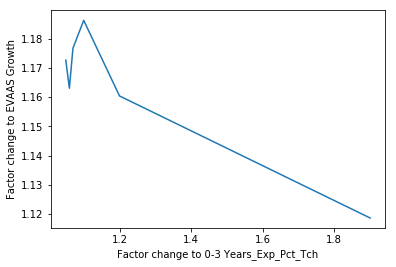

In [13]:
%matplotlib inline
plt.plot(factors, results)
plt.xlabel('Factor change to 0-3 Years_Exp_Pct_Tch')
plt.ylabel('Factor change to EVAAS Growth')

** Could use a similar process to iterate over different factor levels, but also over different models, and then averaging their results as an ensemble **

eg:

In [11]:
for model in ['adaboost', 'random_forest']:
    etc etc

SyntaxError: invalid syntax (<ipython-input-11-c424e6b3baf3>, line 2)